# Generate a spectrogram from a file
Do imports first

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
# to enable zooming in matplotlib in notebook
#%matplotlib notebook 
#conda install -c conda-forge ipympl # or pip install ipympl #This is to allow zooming in the notebook
# %matplotlib ipympl

Name audio and annotation file that you want to import (without the extensions), then read in the audio and annotations

In [2]:
#File index
file = 'data/Rupes A and B/5713.210809120002'  #from PPT at time 892-896 (Rupe B)
# file = 'data/Guttural rupe/5711.211013040024'
# file = 'data/Moan/5713.210902110002'  #from PPT at time 212 seconds

#Read the 2 files
sample_rate, samples = wavfile.read(file+'.wav')
annot_file_path = file +'.Table.1.selections.txt'

#Read the file into a DataFrame
df = pd.read_csv(annot_file_path, sep='\t')

#Display the first few rows of the DataFrame
df.head(10)


,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),Annotation
0,1,Spectrogram 1,1,871.984579,872.045877,75.224,426.862,0.0613,351.638,-97.26,Rupe A
1,2,Spectrogram 1,1,872.605082,872.730809,42.314,470.151,0.1257,427.837,-84.86,Rupe A
2,3,Spectrogram 1,1,873.525329,873.616653,65.821,493.658,0.0913,427.837,-90.74,Rupe A
3,4,Spectrogram 1,1,874.776471,874.904325,70.523,441.942,0.1279,371.419,-91.90,Rupe A
4,5,Spectrogram 1,1,876.693356,876.876005,47.015,413.733,0.1826,366.718,-90.45,Rupe A
5,6,Spectrogram 1,1,877.095183,877.364589,56.418,460.748,0.2694,404.330,-89.10,Rupe B
6,7,Spectrogram 1,1,884.521098,884.664983,47.009,422.764,0.1439,375.755,-88.91,Rupe A
7,8,Spectrogram 1,1,887.606950,887.981380,65.821,441.942,0.3744,376.121,-86.11,Rupe B
8,9,Spectrogram 1,1,891.800005,892.179001,61.120,451.345,0.3790,390.225,-85.42,Rupe B
9,10,Spectrogram 1,1,892.539731,893.119640,61.120,474.852,0.5799,413.732,-86.58,Rupe B


## Perform EDA


In [36]:
#Display the columns of the DataFrame
df.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Delta Time (s)', 'Delta Freq (Hz)',
       'Avg Power Density (dB FS/Hz)', 'Annotation'],
      dtype='object')

In [37]:
# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Selection                     29 non-null     int64  
 1   View                          29 non-null     object 
 2   Channel                       29 non-null     int64  
 3   Begin Time (s)                29 non-null     float64
 4   End Time (s)                  29 non-null     float64
 5   Low Freq (Hz)                 29 non-null     float64
 6   High Freq (Hz)                29 non-null     float64
 7   Delta Time (s)                29 non-null     float64
 8   Delta Freq (Hz)               29 non-null     float64
 9   Avg Power Density (dB FS/Hz)  29 non-null     float64
 10  Annotation                    29 non-null     object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.6+ KB
None


In [38]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Selection,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz)
count,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,1.0,953.512370,953.783284,58.660828,451.367069,0.270910,392.706241,-88.994483
std,8.514693,0.0,87.193672,87.160760,7.474535,95.183181,0.153009,94.687874,3.110412
min,1.000000,1.0,871.984579,872.045877,42.314000,178.657000,0.061300,122.239000,-97.260000
25%,8.000000,1.0,884.961746,885.231530,56.418000,422.764000,0.143900,366.718000,-90.450000
50%,15.000000,1.0,962.736346,963.151872,61.120000,460.748000,0.269400,409.031000,-88.540000
75%,22.000000,1.0,979.767351,980.109817,61.120000,503.061000,0.374400,442.726000,-86.600000
max,29.000000,1.0,1150.321528,1150.412852,75.224000,682.927000,0.579900,617.886000,-84.860000


In [39]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Selection                       0
View                            0
Channel                         0
Begin Time (s)                  0
End Time (s)                    0
Low Freq (Hz)                   0
High Freq (Hz)                  0
Delta Time (s)                  0
Delta Freq (Hz)                 0
Avg Power Density (dB FS/Hz)    0
Annotation                      0
dtype: int64

In [40]:
# Display unique values in the 'Annotation' column
print("\nUnique Annotations:")
print(df['Annotation'].unique())


Unique Annotations:
['Rupe A' 'Rupe B' 'Rupe C' 'Growl B']


In [41]:
# Count the occurrences of each annotation
print("\nAnnotation Counts:")
print(df['Annotation'].value_counts())


Annotation Counts:
Annotation
Rupe A     14
Rupe B     12
Growl B     2
Rupe C      1
Name: count, dtype: int64


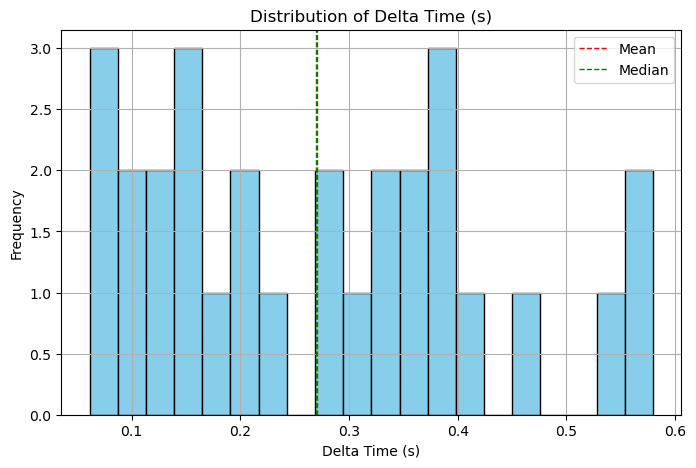

In [42]:
# Plot the distribution of 'Delta Time (s)'
plt.figure(figsize=(8, 5))
df['Delta Time (s)'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delta Time (s)')
plt.xlabel('Delta Time (s)')
plt.ylabel('Frequency')
plt.axvline(df['Delta Time (s)'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Delta Time (s)'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
df.to_csv('annotations.csv', index=False)

# Calculate the Spectrogram

In [ ]:
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate, nperseg=2456, nfft=4096, noverlap=1228, window='hann')       #Try nfft=8192 if computer permits

With the resultsing spectrogram, trim all the tiny values so that log scale displays correctly. Also, all of the relevant info is below 1KHz so trim the data to only display sub 1-KHz frequencies 

In [21]:
spectrogram[spectrogram < 0.001] = 0.001    #Trim off all the tiny values so that log scale displays correctly

#Trim in frequency
fmin = 20 # Hz
fmax = 1000 # Hz
freq_slice = np.where((frequencies >= fmin) & (frequencies <= fmax))

#keep only frequencies of interest
frequencies = frequencies[freq_slice]
spectrogram = spectrogram[freq_slice,:][0]

Next I'm going to define a dunction that will overlay the annotated rectangles onto the spectrogram (different colours for each call)

In [22]:
def overlay_annotations(ax, df, annotation_colors):
    #Track labels to ensure they are added only once in the legend
    added_labels = set()

    for _, row in df.iterrows():
        start_time = row['Begin Time (s)']
        end_time = row['End Time (s)']
        low_freq = row['Low Freq (Hz)']
        high_freq = row['High Freq (Hz)']
        annotation = row['Annotation']

        #Skip if the annotation is not in the defined colors
        if annotation not in annotation_colors:
            continue

        #Draw rectangles
        ax.add_patch(
            plt.Rectangle(
                (start_time, low_freq),  #Bottom Left corner
                end_time - start_time,  #Width (time)
                high_freq - low_freq,  #Height (frequency)
                edgecolor=annotation_colors[annotation],
                facecolor='none',
                linewidth=2,
                label=annotation if annotation not in added_labels else None  #Add label once
            )
        )
        added_labels.add(annotation)  #Mark label as added

    ax.legend(loc='upper right')     #Add legend

I've also written a function below that updates the colormap when you zoom in on a particular region - so that the max and min values are always visible

In [23]:
def update_colormap(event):
    #Get current view limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #Find indices corresponding to the current view limits
    x_indices = np.where((times >= xlim[0]) & (times <= xlim[1]))[0]
    y_indices = np.where((frequencies >= ylim[0]) & (frequencies <= ylim[1]))[0]

    #Handle cases where no data is visible
    if len(x_indices) == 0 or len(y_indices) == 0:
        return

    #Extract the visible data
    data_visible = spectrogram[np.ix_(y_indices, x_indices)]
    #data_visible = np.log(spectrogram)[np.ix_(y_indices, x_indices)]

    #Compute new color limits
    vmin = np.nanmin(data_visible)
    vmax = np.nanmax(data_visible)

    #Update the color limits of the pcolormesh
    pc.set_clim(vmin=vmin, vmax=vmax)
    
    #Update the colorbar to reflect the new color limits
    cbar.update_normal(pc)

    #Redraw the figure
    plt.draw()
    

Ok, let's plot the spectrogram and annotations

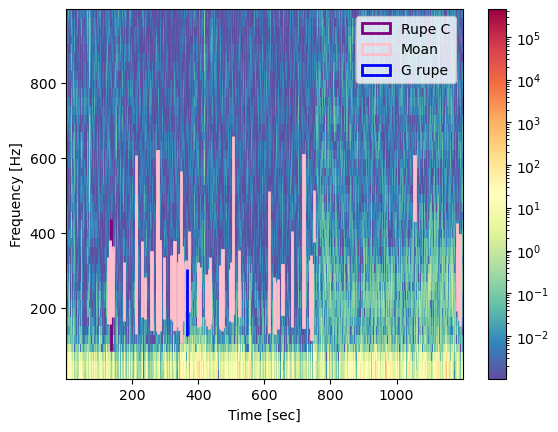

In [24]:
#Define colors for annotations
annotation_colors = {
    "Rupe A": "red",
    "Rupe B": "green",
    "Growl B": "yellow",
    "Rupe C" : "purple",
    "Moan": "pink",
    "G rupe" : "blue"
}

pc = plt.pcolormesh(times, frequencies, spectrogram, norm=LogNorm(), cmap='Spectral_r')
#pc = plt.pcolormesh(times, frequencies, np.log(spectrogram))
cbar = plt.colorbar(pc)
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#Get the current axes
ax = plt.gca()
overlay_annotations(ax, df, annotation_colors)

#Connect the update function to the axes limit change events
ax.callbacks.connect('xlim_changed', update_colormap)
ax.callbacks.connect('ylim_changed', update_colormap)

plt.show()

Extract out a portion of interest from the spectrogram

(25, 469)


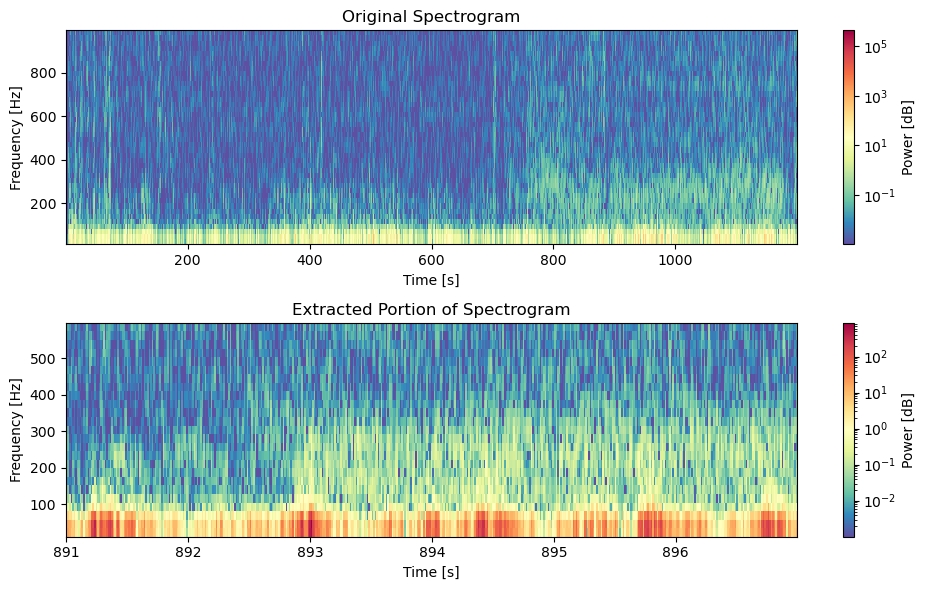

In [25]:
#Define time and frequency limits
time_start, time_end = 891, 897  # Time range in seconds
freq_start, freq_end = 20, 600  # Frequency range in Hz

#Find indices for the time range
time_indices = np.where((times >= time_start) & (times <= time_end))[0]

#Find indices for the frequency range
freq_indices = np.where((frequencies >= freq_start) & (frequencies <= freq_end))[0]

#Extract the portion of the spectrogram
spectrogram_sub = spectrogram[freq_indices][:, time_indices]
frequencies_sub = frequencies[freq_indices]
times_sub = times[time_indices]
print(spectrogram_sub.shape)

#Plot the original and sub-portion spectrograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies, spectrogram, norm=LogNorm(), cmap='Spectral_r')
plt.title('Original Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.subplot(2, 1, 2)
plt.pcolormesh(times_sub, frequencies_sub, spectrogram_sub, norm=LogNorm(), cmap='Spectral_r')
plt.title('Extracted Portion of Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.tight_layout()
plt.show()


I'm going to extract a single call now and check the size of the spectrogram array

Spectrogram size:  (25, 55)


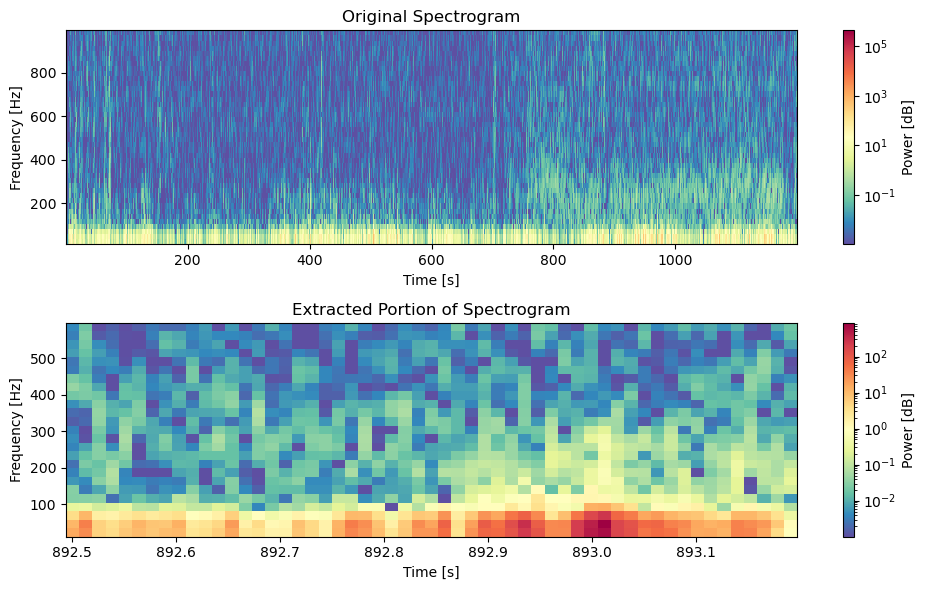

In [26]:
#Define time and frequency limits
time_start, time_end = 892.5, 893.2  # Time range in seconds
freq_start, freq_end = 20, 600  # Frequency range in Hz

#Find indices for the time range
time_indices = np.where((times >= time_start) & (times <= time_end))[0]

#Find indices for the frequency range
freq_indices = np.where((frequencies >= freq_start) & (frequencies <= freq_end))[0]

#Extract the portion of the spectrogram
spectrogram_sub = spectrogram[freq_indices][:, time_indices]
frequencies_sub = frequencies[freq_indices]
times_sub = times[time_indices]
print("Spectrogram size: ", spectrogram_sub.shape)

#Plot the original and sub-portion spectrograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies, spectrogram, norm=LogNorm(), cmap='Spectral_r')
plt.title('Original Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.subplot(2, 1, 2)
plt.pcolormesh(times_sub, frequencies_sub, spectrogram_sub, norm=LogNorm(), cmap='Spectral_r')
plt.title('Extracted Portion of Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.tight_layout()
plt.show()

Try and save the spectrogram plot. (I wouldn't actually do this in practice - I would save the extracted spectrogram as raw data to be used for ML)

In [27]:
plt.savefig('spectrogram.png')
#plt.clf()
print(spectrogram_sub)

[[1.50010042e+01 2.90192795e+01 5.20248985e+00 ... 1.74065781e+01
  4.04212761e+00 8.51336420e-01]
 [1.09668865e+01 3.84469070e+01 5.17471886e+00 ... 2.25838146e+01
  6.91237497e+00 1.06920540e+00]
 [3.88814044e+00 1.10036821e+01 1.88778877e+00 ... 7.55523205e+00
  3.26272893e+00 3.58732879e-01]
 ...
 [5.47924964e-03 2.17560418e-02 4.51725814e-03 ... 8.86247400e-03
  1.34420174e-03 7.75025878e-03]
 [3.34255281e-03 2.48209499e-02 1.41871930e-03 ... 1.00000005e-03
  4.03447030e-03 1.55605804e-02]
 [4.04989347e-03 1.96190663e-02 1.00000005e-03 ... 1.00000005e-03
  9.06608813e-03 1.80702358e-02]]


<Figure size 640x480 with 0 Axes>